# Week 12

## Sets

Sets are collections of objects. Unlike lists they are unordered and every element of a set is unique (no repetitions)

We create sets by enclosing elements in braces:

In [1]:
s = {1, 2, 3}

In [2]:
print(s)

{1, 2, 3}


In order to convert a list or a string into a set we can use the `set()` function:

In [3]:
mylist = [1, 2, 3, 4, 3, 2, 1, 0]

In [4]:
myset = set(mylist)

In [5]:
print(myset)

{0, 1, 2, 3, 4}


In [6]:
t = 'mississippi'
t_set = set(t)

In [8]:
print(t_set)

{'s', 'i', 'p', 'm'}


In [9]:
s = {'a', 2, 'b', 3, 'hello'}

In [10]:
print(s)

{2, 3, 'a', 'hello', 'b'}


Checking if an element is in a set:

In [11]:
3 in s

True

In [12]:
'c' in s

False

**Note** Checking if an element is in a set is usually much faster than checking if an element is in a list:

In [13]:
from time import time

mylist = list(range(10**7))
myset = set(mylist)

In [14]:
st = time()
for n in range(10**7, 10**7+10):
    print(n, n in mylist)
print(time()-st)

10000000 False
10000001 False
10000002 False
10000003 False
10000004 False
10000005 False
10000006 False
10000007 False
10000008 False
10000009 False
1.182452917098999


In [15]:
st = time()
for n in range(10**7, 10**7+10):
    print(n, n in myset)
print(time()-st)

10000000 False
10000001 False
10000002 False
10000003 False
10000004 False
10000005 False
10000006 False
10000007 False
10000008 False
10000009 False
0.0020880699157714844


for loops work for sets:

In [16]:
print(s)

{2, 3, 'a', 'hello', 'b'}


In [17]:
for x in s:
    print(x)

2
3
a
hello
b


## Set operations

In [19]:
s1 = {'a', 'b', 'c', 'd'}
s2 = {'c', 'd', 'e', 'f'}

Union of sets:

In [20]:
s = s1 | s2

In [21]:
print(s)

{'e', 'a', 'd', 'f', 'b', 'c'}


Intersection of sets:

In [22]:
s = s1 & s2
print(s)

{'c', 'd'}


Difference of sets:

In [23]:
s = s1-s2
print(s)

{'a', 'b'}


In [24]:
s = s2-s1
print(s)

{'f', 'e'}


Symmetric difference (elements that are in either set but not in their intersection):

In [26]:
s = s1^s2
print(s)

{'e', 'a', 'f', 'b'}


Adding an element to a set:

In [27]:
print(s1)

{'a', 'd', 'c', 'b'}


In [28]:
s1.add('x')

In [29]:
print(s1)

{'a', 'd', 'b', 'c', 'x'}


Removing an element from a set:

In [30]:
s1.discard('a')

In [31]:
print(s1)

{'d', 'b', 'c', 'x'}


The `pop()` function removes a random element from a set and returns this element.

In [32]:
print(s1)

{'d', 'b', 'c', 'x'}


In [33]:
x = s1.pop()

In [34]:
print(s1)

{'b', 'c', 'x'}


In [35]:
print(x)

d


Checking is a set is a subset of another set:

In [1]:
s1 = {'a', 'b', 'c'}
s2 = {'a', 'b'}

In [2]:
s1 < s2

False

In [3]:
s2 < s1

True

**Note.** Sets are mutable:

In [42]:
s1 = {'a', 'b', 'c'}
s2 = s1

In [43]:
s2.discard('a')

In [44]:
print(s2)

{'c', 'b'}


In [45]:
print(s1)

{'c', 'b'}


**Note.** Elements of a set must be non-mutable objects:

In [46]:
s1 = {'a', 1, [1,2]}

TypeError: unhashable type: 'list'

In [47]:
s1 = {'a', 1, tuple([1,2])}

In [48]:
print(s1)

{'a', 1, (1, 2)}


In [49]:
s2 = frozenset(s1)

In [50]:
print(s2)

frozenset({'a', 1, (1, 2)})


In [51]:
s = {s2}

In [52]:
print(s)

{frozenset({'a', 1, (1, 2)})}


**Note:** Empty braces `{}` denote the empty dictionary. To create an empty set use `set()`

In [53]:
s = set()

In [54]:
print(s)

set()


In [55]:
s.add(1)

In [56]:
print(s)

{1}


In [57]:
s1 = {'a', 'b'}
s2 = {'c', 'd'}
s = s1 & s2

In [58]:
print(s)

set()


## Project 9: PageRank

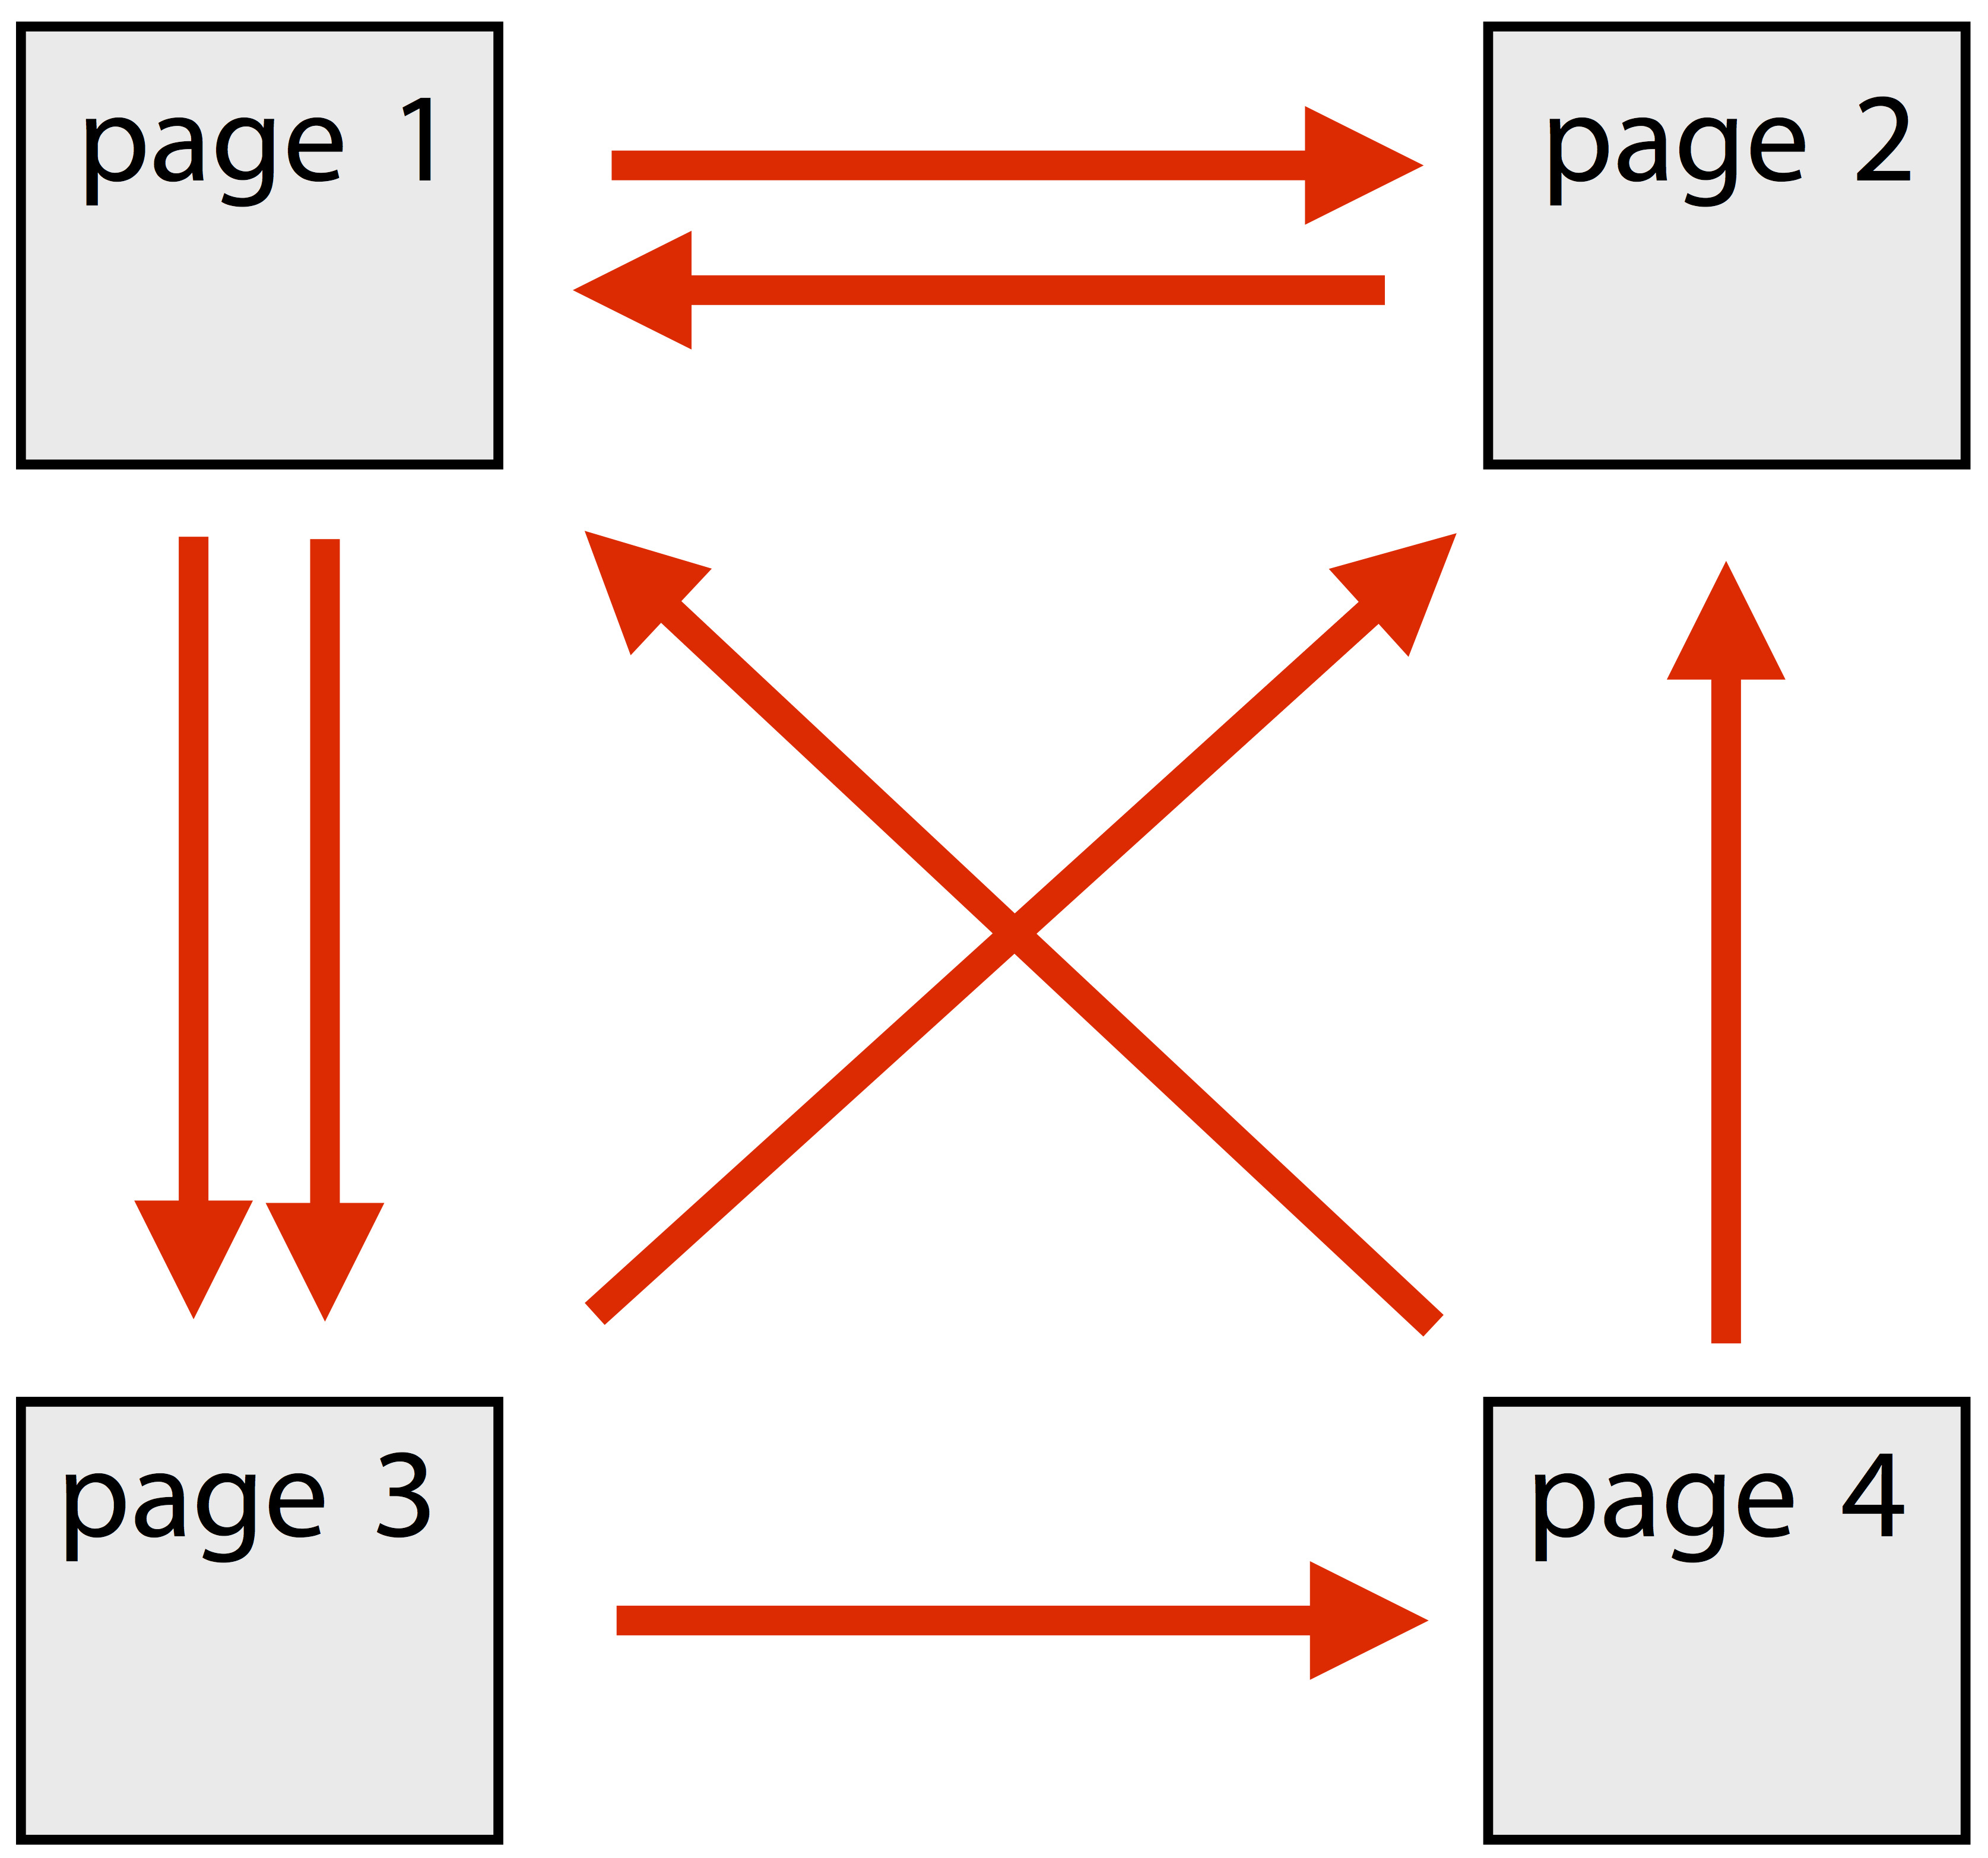

In [6]:
from IPython.display import Image
Image("web.png", width=300)

System of equations for PageRank computations in the above network:

$$
\begin{cases}
x_1 - x_2 - \frac{1}{2}x_4 = 0 \\
x_2 - \frac{1}{3} x_1 - \frac{1}{2}x_3 - \frac{1}{2}x_4  = 0 \\
x_3 - \frac{2}{3}x_1  = 0 \\
x_4 -  \frac{1}{2}x_3= 0 \\
x_1 + x_2 + x_3 + x_4 = 1 \\
\end{cases}
$$

Matrix equation:

$$
\begin{bmatrix}
\ \  1 & -1 & \ \ 0 & -\frac{1}{2} \\
-\frac{1}{3} & \ \ 1  & -\frac{1}{2} & - \frac{1}{2} \\
-\frac{2}{3} & \ \ 0 & \ \ 1 & \ \ 0 \\
\ \ 0 & \ \ 0 & -\frac{1}{2} &\ \  1 \\
\ \ 1 & \ \ 1 & \ \ 1 & \ \ 1 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{bmatrix}
= 
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
1 \\
\end{bmatrix}
$$

## Solving systems of linear equations:

The numpy function `np.linalg.solve(A, b)` gives a solution of the matrix equation $Ax = b$

In [59]:
import numpy as np

In [60]:
A = np.array([[1, 1], [1, -1]])
b = np.array([2,3])

In [61]:
np.linalg.solve(A, b)

array([ 2.5, -0.5])

**NOte:** This function works only if A is an square invertible matrix:

In [62]:
A = np.array([[1,1], [1,1]])
b = np.array([1,1])

In [63]:
np.linalg.solve(A, b)

LinAlgError: Singular matrix

Due to rounding errors this function may not work even for invertible matrices:

In [64]:
A = np.array([[1,1], [1,1.00000000000000000000001]])
b = np.array([1,1])

In [65]:
np.linalg.solve(A, b)

LinAlgError: Singular matrix

The numpy function `np.linalg.lstsq(A, b)` is computing least square solutions of a matrix equation Ax = b. This will work for any matrix.  

In [70]:
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([1, 1, 1])

sol = np.linalg.lstsq(A, b)
print(sol)

(array([-1.,  1.]), array([  1.83244870e-31]), 2, array([ 9.52551809,  0.51430058]))


This function returns a tuple of elements with several values:

The first element is a numpy array with least square solutions of the matrix equation: 

In [71]:
sol[0]

array([-1.,  1.])

The second element if the distance between Ax and b, where x is the computed solution:

In [72]:
sol[1]

array([  1.83244870e-31])

The third element is the rank of the matrix A:

In [73]:
sol[2]

2

The last element are singular values of the matrix A:

In [75]:
sol[3]

array([ 9.52551809,  0.51430058])

Application: computation of rankings in our sample network:

In [77]:
A = np.array([[1, -1, 0, -1/2], [-1/3, 1, -1/2, -1/2], [-2/3, 0, 1, 0], [0,0,-1/2, 1], [1, 1, 1, 1]])
b = np.array([0,0,0,0,1])

In [79]:
print(np.linalg.lstsq(A, b))

(array([ 0.35294118,  0.29411765,  0.23529412,  0.11764706]), array([  2.44447803e-33]), 4, array([ 2.07871928,  1.75166294,  1.36867082,  1.1370571 ]))
